# <center>Gradient Descent Method</center>
<font size='3'>
In everyday life, gradient means the rise or slope of something. To understand it mathematically, let's say I have a function f(x) (let's say a person's salary) that depends on x, where x can be a single variables (let's say education) or a set of numbers with different variables (let's say education, job position, etc.) and in such a scenario x is said to be an independent variable. With such a definition, the function f is controlled by the value of x, ie if I change x slightly, f(x) would change accordingly. Now our goal is to find the largest rate of change of f(x) with respect to x and this is obtained by taking the derivative of f(x) with respect to x i.e gradient as 
$$\frac{df(x)}{dx}$$ 
In the next step I want to find the values of x that make the function decreasing, which means $\frac{df(x)}{dx}$ is negative (gradient descent) and ultimately $\frac{df(x) } {dx}|_{x=x_0}$ = 0 (minimization of f(x) with respect to x). This is the essence of the gradient descent method.<br>

In the field of machine learning, the function f(x) often refers to a target variable (or perhaps label) and variable/n x often associated with the features that have a strong impact on the target variable. And instead of the f(x) function, I want to minimize the cost function. The cost function can be understood as follows. When I have enough data, which is mostly the case in machine learning, I use features to fit an arbitrary function, which can be a linear regressor, polynomial, etc., depending on what kind of problem I want to solve. From this fitting I get new f(x) let's say $f_{fit}(x)$ and see the difference $\Delta=f(x)-f_{fit}(x)$. Now my goal must be to minimize the $\Delta$. To do this I tune or adjust the number of parameters that are in the linear regressor or polynomial etc and see how that change makes the difference. Of course I don't do it manually :-) but I write a program for it. In the following, f(x) and $f_{fit}(x)$ correspond to $y^{real}_i$ and $y^{new}_i$, respectively.  <br>

To avoid the ambiguity, I want to confine myself to the linear regression problem, and that can easily be generalized to the multi-regression problem. First, let me make a problem statement: <b>I have data and I want to develop the linear regression model to make predictions on new data</b>. My model would be $$y^{new}_i = {a}x_i+b$$ Where $a$ bias often referred to as weight and $b$ as bias. I have $y^{real}_i$ from given data and get $y^{new}_i$ from the model and compute the cost function as <br>

### Cost Function
$$MSE=\frac{1}{n}\sum_i^n(y^{real}_i-y^{new}_i)^2$$ 
$$MSE=\frac{1}{n}\sum_i^n(y^{real}_i-({a}x_i+b))^2$$ 

### Gradients

In the following, the partial derivatives of MSE with $a$ and $b$ are calculated
$$\frac{dMSE}{da}=\frac{-2}{n}\sum_i^n x_i*(y^{real}_i-({a}x_i+b))$$
$$\frac{dMSE}{db}=\frac{-2}{n}\sum_i^n (y^{real}_i-({a}x_i+b))$$

### Update a (weight) and b (bias)
<br>

To update $a$ and $b$, I use a fraction of the gradients and this is determined by the learning rate (lr). When the learning rate is low, the model learns very slowly (the mean takes more time to calculate), but eventually brings the cost function to the bare minimum. On the other hand, if the learning rate is large, then it overshoots on another side of the minimum, and that's bad. Therefore this value should be choosen carefully.<br>

$$a = a - lr*\frac{dMSE}{da}$$
$$b = b - lr*\frac{dMSE}{db}$$


In machine learning jargon, x are the features of data, f(x) or $y^{real}_i$ is the target variable. The goal is always to find an optimal weight and bias that makes $y^{new}_i$ as close as possible to $y^{real}_i$ and thereby brings the cost function very close to zero. Once I have the optimal weight and bias, I can generalize the model so that it can make a prediction for any given value of x. At least that's the idea in a nutshell.

Now I have explained everything as clearly as possible and the next step is to go to the code shell and write this formula in Python code.
</font>

In [15]:
#Import necessary modules
#numpy for an array operations and matplotlib is for graphical representation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Once the required modules are loaded, the next step is to define a simple linear regression model, which is done inside the our_model function. Why linear regression? To answer this question, the first point has to be that it is simple but powerful. It can be used to predict everyday phenomena. For example, how much electricity consumption will grow in summer, given that the outdoor temperature rises and the number of family members increases. This model can be applied whenever some property or phenomenon depends on a variable.

In [2]:
#Define a function that takes independent variables and 
#returns the output of our linear regression model
def our_model(x,new_a,new_b):
    y_new = new_a*x + new_b
    return y_new

In [3]:
def cost_fuction(y_real,y_new):
    '''Calculate the loss or cost function with the mean sqaure error '''
    MSE = (1.0/len(y_real))*np.sum((y_real-y_new)**2)
    return MSE

In [4]:
#Function to calculate the change in cost function with weights 
#and bias according to the formulas above.
def gradient_with_ab(y_real,x,a,b):
    #The change of MSE with a
    dMSE_da = (-2.0/len(y_real))*np.sum(x*(y_real-(a*x+b)))
    #The change of MSE with b
    dMSE_db = (-2.0/len(y_real))*np.sum((y_real-(a*x+b)))
    return dMSE_da, dMSE_db

In [5]:
def update_weight_bias(lr,dMSE_da, dMSE_db):
    '''Function to update weight (a) and bias (b) according to the formulas given above.'''
    new_a = new_a - lr*dMSE_da
    new_b = new_b - lr*dMSE_db
    return new_a,new_b    

<font size="2.5">
Care should be taken when defining the function as follows. What I mean by that is, in the following function I explicitly specify iterations, learning rate and threshold and any argument after that can't be non-default argument. Non-default argument means something is passed to the function when it is invoked, and default argument means the value is specified explicitly, like iterations, learning_rate, and threshold_stop in the function gradient_descent_method (see below). If this care is not given, there will be <b>SyntaxError</b> with a message non-default argument follows default argument.
</font>    

In [28]:
#In machine learning, adjusting the number of iterations, learning rate,
#and stopping threshold is called hyperparameter tuning.
def gradient_descent_method(x,y_real,answer,iterations=1000, lr=0.0001,threshold_stop=1e-5):
    #Initialize a, b, iterations, and the learning rate respectively
    new_a         = 0.01
    new_b         = 0.01
    iterations    = iterations
    learning_rate = lr        
    
    #To capture costs, weights, and old cost of every iterations
    #List initialization
    all_costs = []
    weights   = []
    bias      = []
    old_costs = None        
    
    #Real minimization happen here
    for i in range(iterations):
        #y_new predicted by the linear regression model
        y_new = our_model(x,new_a,new_b)
        
        #Calculate how off y_new is from y_real
        new_costs = cost_fuction(y_real,y_new)
        
        #Let's see if the change in cost function is already within an acceptable limit or not
        #If so, exit the loop
        
        if old_costs and abs(old_costs-new_costs) <=threshold_stop:
            #Care must be taken here, when I set sys.exit() no line of code is executed afterwards
            #I just want to get out of this loop, but want other lines of code to run
            break
            
            
        old_costs = new_costs
        
        all_costs.append(new_costs)
        weights.append(new_a)
        bias.append(new_b)
        
        #Receive gradient of cost functions with weight a and bias b 
        dMSE_da, dMSE_db = gradient_with_ab(y_real,x,new_a,new_b)
        
        #Let me update the weight and bias respectively using the fraction (lr)
        #of the cost function change with respect to them, dMSE_da and dMSE_db
        new_a = new_a - lr*dMSE_da
        new_b = new_b - lr*dMSE_db
        
        #If I tell program to print cost, weight, and biases for each iteration
        if (answer):
            print(f'Interation number: {i+1}, Cost: {new_costs}, Weight: {new_a}, and Bias: {new_b}')            
                            
    
    return new_a, new_b, weights, all_costs

In [7]:
def user_input():
    answer = input('Do you want to print weight and biases for every iterations?\n')
    possible_answers = ['yes','Yes','YES','YEs','yES','']
    final_answer = False    
    if answer in possible_answers:
        final_answer = True
    return final_answer    

In [9]:
def model_prediction(X,Y,final_weight,final_bias):
    estimated_y = final_weight*X + final_bias
    
    plt.figure(figsize=(8,6))
    plt.scatter(X,Y,marker='o',color='blue')    
    plt.plot(X,estimated_y,color='red',markerfacecolor='blue',markersize=8,linestyle='dashed')
    plt.title('Fitting the model to real data')
    plt.xlabel('Independent Variable (X)')
    plt.ylabel('Dependent Variable (Y)')
    plt.show()
    

In [10]:
def visualize_output(weights,all_costs):
    #Let's see how the cost changes with weight and biases.
    plt.figure(figsize=(8,6))
    plt.plot(weights,all_costs)
    plt.scatter(weights,all_costs,marker='o',color='red',linewidth=2.0)
    plt.title('Cost versus Weights')
    plt.xlabel('Cost')
    plt.ylabel('Weight')
    plt.show()    

Do you want to print weight and biases for every iterations?
yes
Interation number: 1, Cost: 4966.181207290087, Weight: 0.7153203880008462, and Bias: 0.023784918843199006
Interation number: 2, Cost: 1261.5727772145765, Weight: 1.060074327810951, and Bias: 0.030519068481383534
Interation number: 3, Cost: 376.48218478641553, Weight: 1.228586833244487, and Bias: 0.0338068695252772
Interation number: 4, Cost: 165.01979334363315, Weight: 1.3109542096816003, and Bias: 0.03541012832629375
Interation number: 5, Cost: 114.49802341557184, Weight: 1.351214670250197, and Bias: 0.03618999899354214
Interation number: 6, Cost: 102.42755884506144, Weight: 1.3708936727070187, and Bias: 0.0365674054265418
Interation number: 7, Cost: 99.54373012686051, Weight: 1.380512655110678, and Bias: 0.036748091205114845
Interation number: 8, Cost: 98.85473660341528, Weight: 1.3852143958435106, and Bias: 0.03683262182503459
Interation number: 9, Cost: 98.69012454121557, Weight: 1.3875126358354604, and Bias: 0.036870

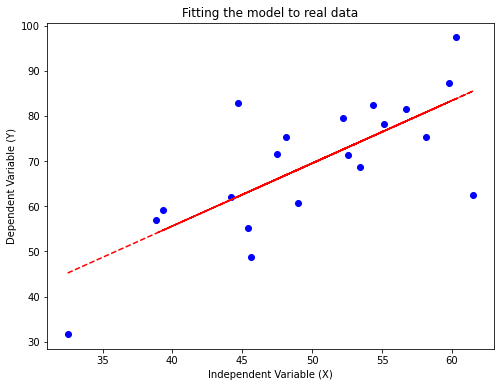

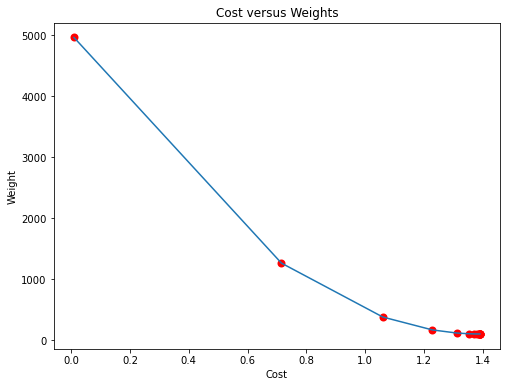

In [29]:
def linear_regression():
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])        
    
    answer = user_input()
                
    #Take final weight and bias from the gradient descent algorithm
    final_weight,final_bias,all_weights, all_costs = gradient_descent_method(X,Y,answer,iterations=2000)    
    print(f'Final weights: {final_weight}\n Final Bias: {final_bias}')
    
    #Make prediction with final weight and bias
    model_prediction(X,Y,final_weight,final_bias)
    
    #Let plot how cost is converging according to weights
    visualize_output(all_weights,all_costs)
    
linear_regression()